In [4]:
# This is a sample Python script.
from datetime import datetime
import time

from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

In [5]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
# tickers = ["BTC-USD", "ETH-USD"]
tickers = ["MSFT", "QQQ"]

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
# tickData = tickData.dropna()

print(tickData.shape)
# Most Recent Data
tickData.head(50)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(1516, 2)


,MSFT,QQQ
Date,,
2018-01-02,80.228996,152.072784
2018-01-03,80.602379,153.550400
2018-01-04,81.311790,153.819092
2018-01-05,82.319901,155.363861
2018-01-08,82.403915,155.968369
2018-01-09,82.347908,155.977966
2018-01-10,81.974541,155.613342
2018-01-11,82.217224,156.678421
2018-01-12,83.636086,157.829834


Pair Created (MSFT, QQQ)
Start train 2019-02-11 00:00:00) End train 2020-07-22 00:00:00)
Start test 2020-07-23 00:00:00) End test 2021-06-15 00:00:00)
linear regression OLS lookback window
Beta 2.051034472506839 Constant -0.8491617533216
Ad Fuller P  0.2867248152363346 statistic -1.9996540307342092 critical vals {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}
TODO TRADE STRAT


/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.c = self.model.params[0]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/cointegration/linear_regression.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.beta = self.model.params[1]
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/src/pairs/coint_functions.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the 

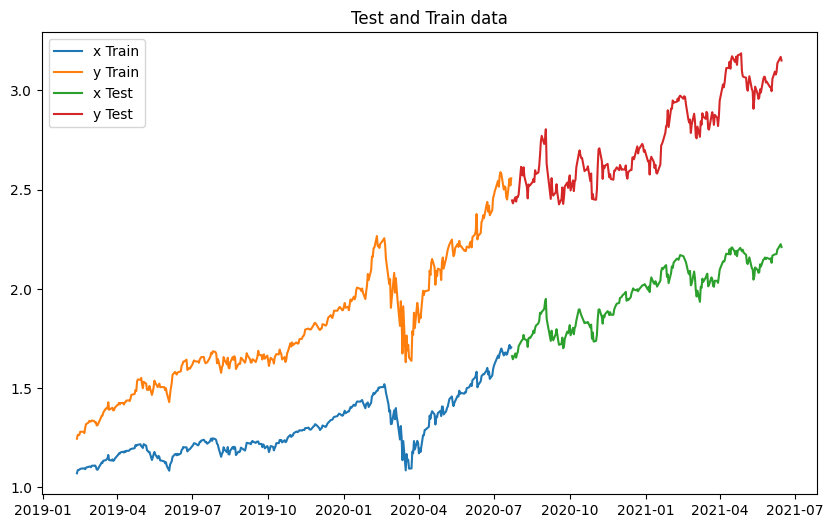


Linear Regresion TRAINING MSFT, QQQ
       Estimate  SD of Estimate  t-Statistic        p-value
const -0.849162        0.040782   -20.821812   6.395626e-64
QQQ    2.051034        0.031363    65.397481  6.197201e-203

Dicky Fuller TRAINING MSFT, QQQ
      1% DF     5% DF    10% DF  adf_statistic   p_value is_stationary
0 -3.448494 -2.869535 -2.571029      -1.999654  0.286725         False


NameError: name 'regresion_ols' is not defined

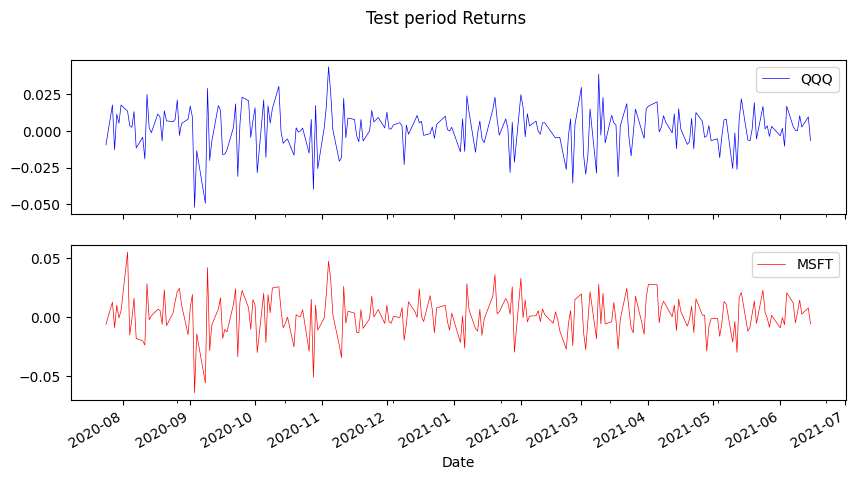

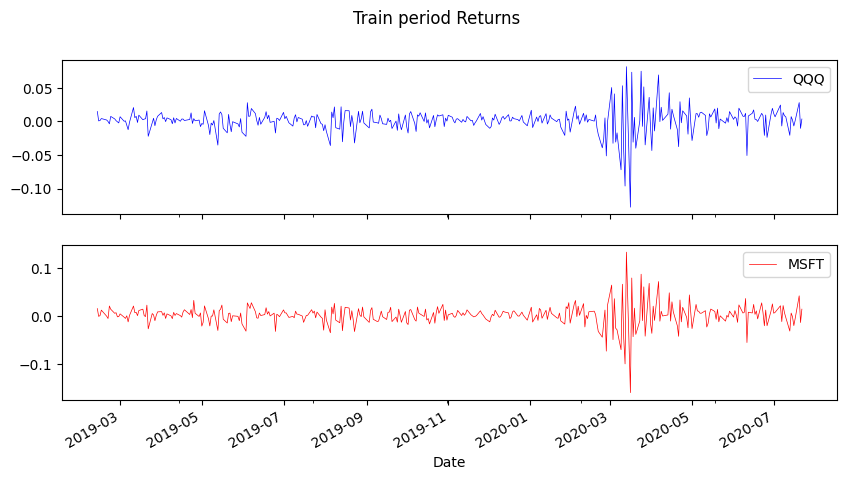

In [6]:
import matplotlib.pyplot as plt

y_norm = normalize_start_1(tickData['MSFT'])
x_norm = normalize_start_1(tickData['QQQ'])

# x_train, y_train, x_test, y_test = get_pivoted_test_train_data(y_norm, x_norm, end_look_back_date='2019-01-03', lookback_period=365)
x_train, y_train, x_test, y_test = get_pivoted_test_train_data(y_norm, x_norm, end_look_back_date='2020-01-03', lookback_period=365)

pair = TradingPair(x_train, y_train, x_test, y_test)

plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(pair.x_train, label='x Train')
plt.plot(pair.y_train, label='y Train')
plt.plot(pair.x_test, label='x Test')
plt.plot(pair.y_test, label='y Test')
plt.title('Test and Train data')  # You can customize the title
plt.legend()  # This adds the legend to the plot
plt.show() 

merged_returns_test = pd.merge(pair.returns_test_x,pair.returns_test_y, on='Date', how='inner')
merged_returns_test.plot(figsize=(10,5), color=('b', 'r', 'g'), subplots=True, linewidth=0.5, title="Test period Returns")
merged_returns_train = pd.merge(pair.returns_train_x,pair.returns_train_y, on='Date', how='inner')
merged_returns_train.plot(figsize=(10,5), color=('b', 'r', 'g'), subplots=True, linewidth=0.5, title="Train period Returns")

print()
print('Linear Regresion TRAINING', pair.name)
print(pair.linear_regression_training_df)
print()
print('Dicky Fuller TRAINING', pair.name)
print(pair.adf_lookback_df)


from src.cointegration.linear_regression import regresion_ols
regression_test = regresion_ols(y_test, x_test)
regression_test.fit()
# self.linear_regression_training_df = regression.df_results
test_res = regression_test.residuals

plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(pair.train_residuals, label='Training OLS Residuals')
plt.plot(pair.test_residual_predict, label='Test Predicted Residuals')
plt.plot(test_res, label='Test Actual  Residuals')
plt.title('Test residuals from OLS, and the Training Predicted Residuals')  # You can customize the title
plt.legend()  # This adds the legend to the plot
plt.show() 


from matplotlib import gridspec

plt.figure(1, figsize=(15, 20))
# gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.5, 0.5])

from statsmodels.graphics.tsaplots import plot_pacf

ax = plt.subplot(gs[2])
plot_pacf(pair.train_residuals, lags=50, alpha=0.01, ax=ax)
plt.title('PACF Plot of test residuals')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.text(x=40.5, y=0.85, s='PACF', size='xx-large')
plt.show() 


#Correction Equations - ECM - one way - do other by a reverse
ΔperiodicCointX = pd.DataFrame(pair.x_train).diff().dropna().add_prefix('Δ')
ΔperiodicCointY = pd.DataFrame(pair.y_train).diff().dropna().add_prefix('Δ')

rhs = ΔperiodicCointY.join(pair.train_residuals.shift(1).dropna().add_prefix('(Lag 1, ').add_suffix(')'))
rhs_ow = ΔperiodicCointX.join(pair.train_residuals.shift(1).dropna().add_prefix('(Lag 1, ').add_suffix(')')) 

model, EG_2,res_2 = linear_regression(ΔperiodicCointX, rhs, False)
print("Overview ΔBTC on ΔETH  and lagged residuals")
EG_2


pair.ou_range_bound_train_df.plot(title="Range Bound Train OU Process")
pair.ou_range_bound_test_df.plot(title="Range Bound Test OU Process")



In [ ]:
y_test

Date
2020-07-23    2.446165
2020-07-24    2.431189
2020-07-27    2.461986
2020-07-28    2.439885
2020-07-29    2.464522
                ...   
2021-06-09    3.092373
2021-06-10    3.136883
2021-06-11    3.144809
2021-06-14    3.169198
2021-06-15    3.150541
Name: MSFT, Length: 226, dtype: float64

In [ ]:
x_train, y_train, x_test, y_test = get_pivoted_test_train_data(tickData['ETH-USD'],tickData['BTC-USD'], end_look_back_date='2019-01-01', lookback_period=365)

x_train

KeyError: 'ETH-USD'

In [ ]:
EG_2